In [83]:
print("sairam")

sairam


### 1. Import libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.exporess as px
import warnings

### 2. Read Data

In [85]:
file_path = "./data/healthcare-dataset-stroke-data.csv"
data = pd.read_csv(file_path)
print(f"shape: {data.shape}")

data.head()

shape: (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [86]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


* Average age of the sample: 43 years
* 25% of people are less than 25years of age
* 25% of people are more than 61 years of age
* hypertension & heart-disease are binary feature (1/0)
* avg of glucoe level is 106
* avg of bmi is 28(obeise)
* stroke is highly imbalanced

In [87]:
data['stroke'].value_counts(normalize=True), data['stroke'].value_counts(normalize=False)

(stroke
 0    0.951272
 1    0.048728
 Name: proportion, dtype: float64,
 stroke
 0    4861
 1     249
 Name: count, dtype: int64)

### 3. Exploring Data

In [88]:
numerical_features   = data.select_dtypes(exclude='O').columns
categorical_features = data.select_dtypes('O').columns

print(f"{len(numerical_features)}  --> {numerical_features}")
print(f"{len(categorical_columns)} --> {categorical_columns}")

7  --> Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')
5 --> Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [89]:
for col in categorical_columns:
    print(f"^^^{col}^^^")
    print(data[col].value_counts(normalize=True) * 100)
    print('*'*40)

^^^gender^^^
gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64
****************************************
^^^ever_married^^^
ever_married
Yes    65.616438
No     34.383562
Name: proportion, dtype: float64
****************************************
^^^work_type^^^
work_type
Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: proportion, dtype: float64
****************************************
^^^Residence_type^^^
Residence_type
Urban    50.802348
Rural    49.197652
Name: proportion, dtype: float64
****************************************
^^^smoking_status^^^
smoking_status
never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: proportion, dtype: float64
****************************************


### 4. Univariate analysis

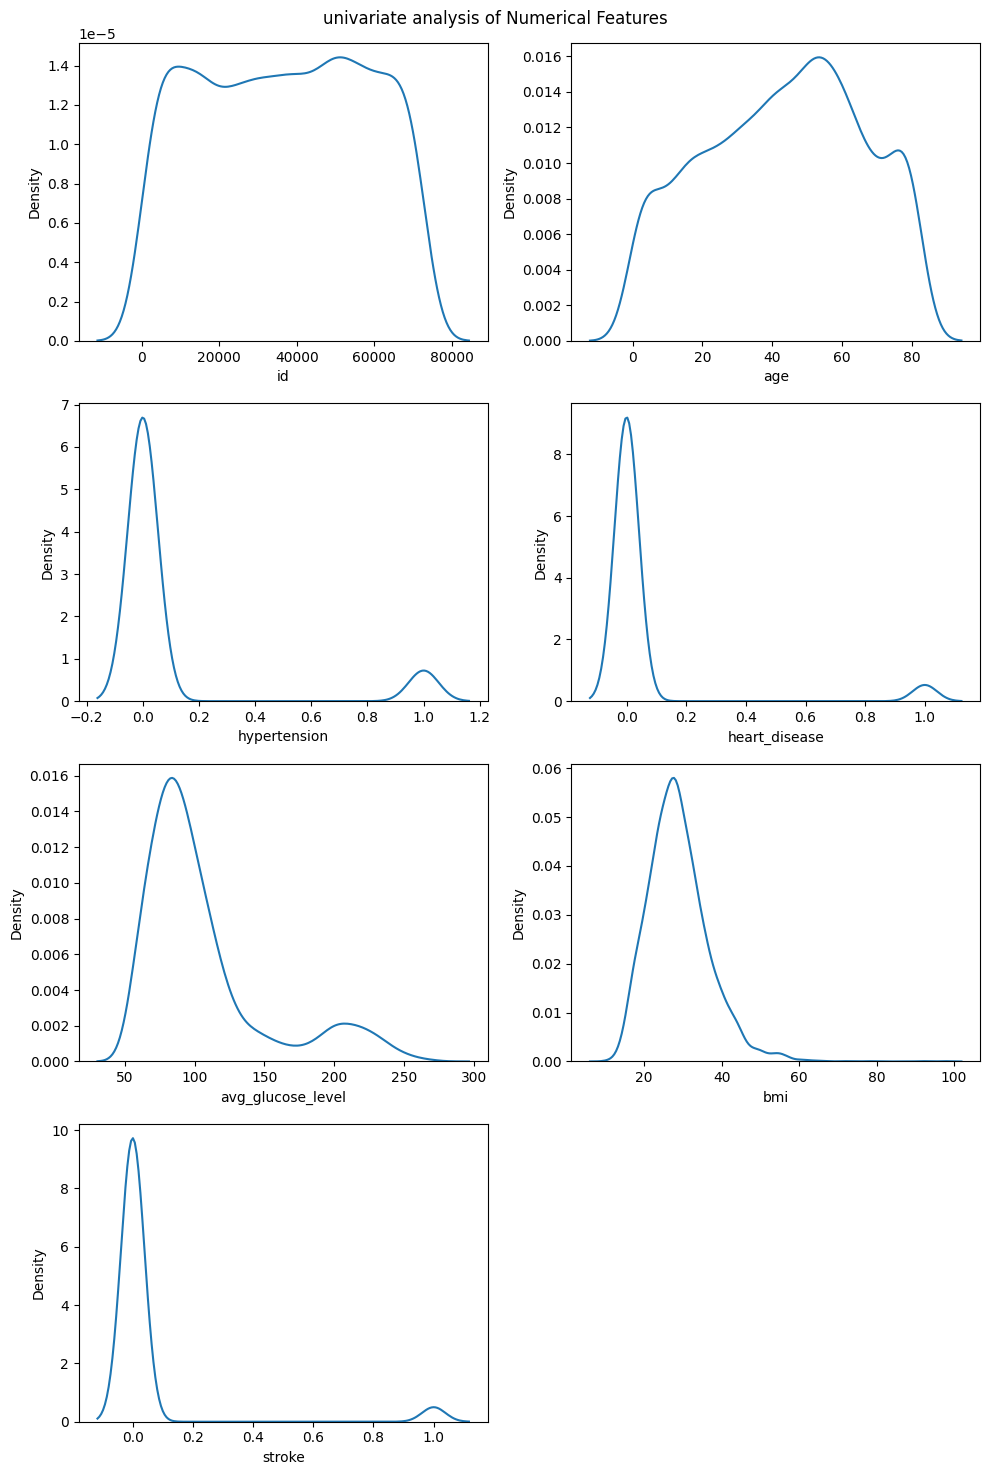

In [90]:
plt.figure(figsize=(10,15))
plt.suptitle("univariate analysis of Numerical Features")

for i in range(0, len(numerical_features)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(data[numerical_features[i]])
    plt.xlabel(f"{numerical_features[i]}")
    plt.tight_layout()
plt.show()

* age, bmi & average glucoce level are actual numerical
* rest of the featuers heart disease, hypertension can be considered as categorical itself
* id can be excluded

##### Categorical features

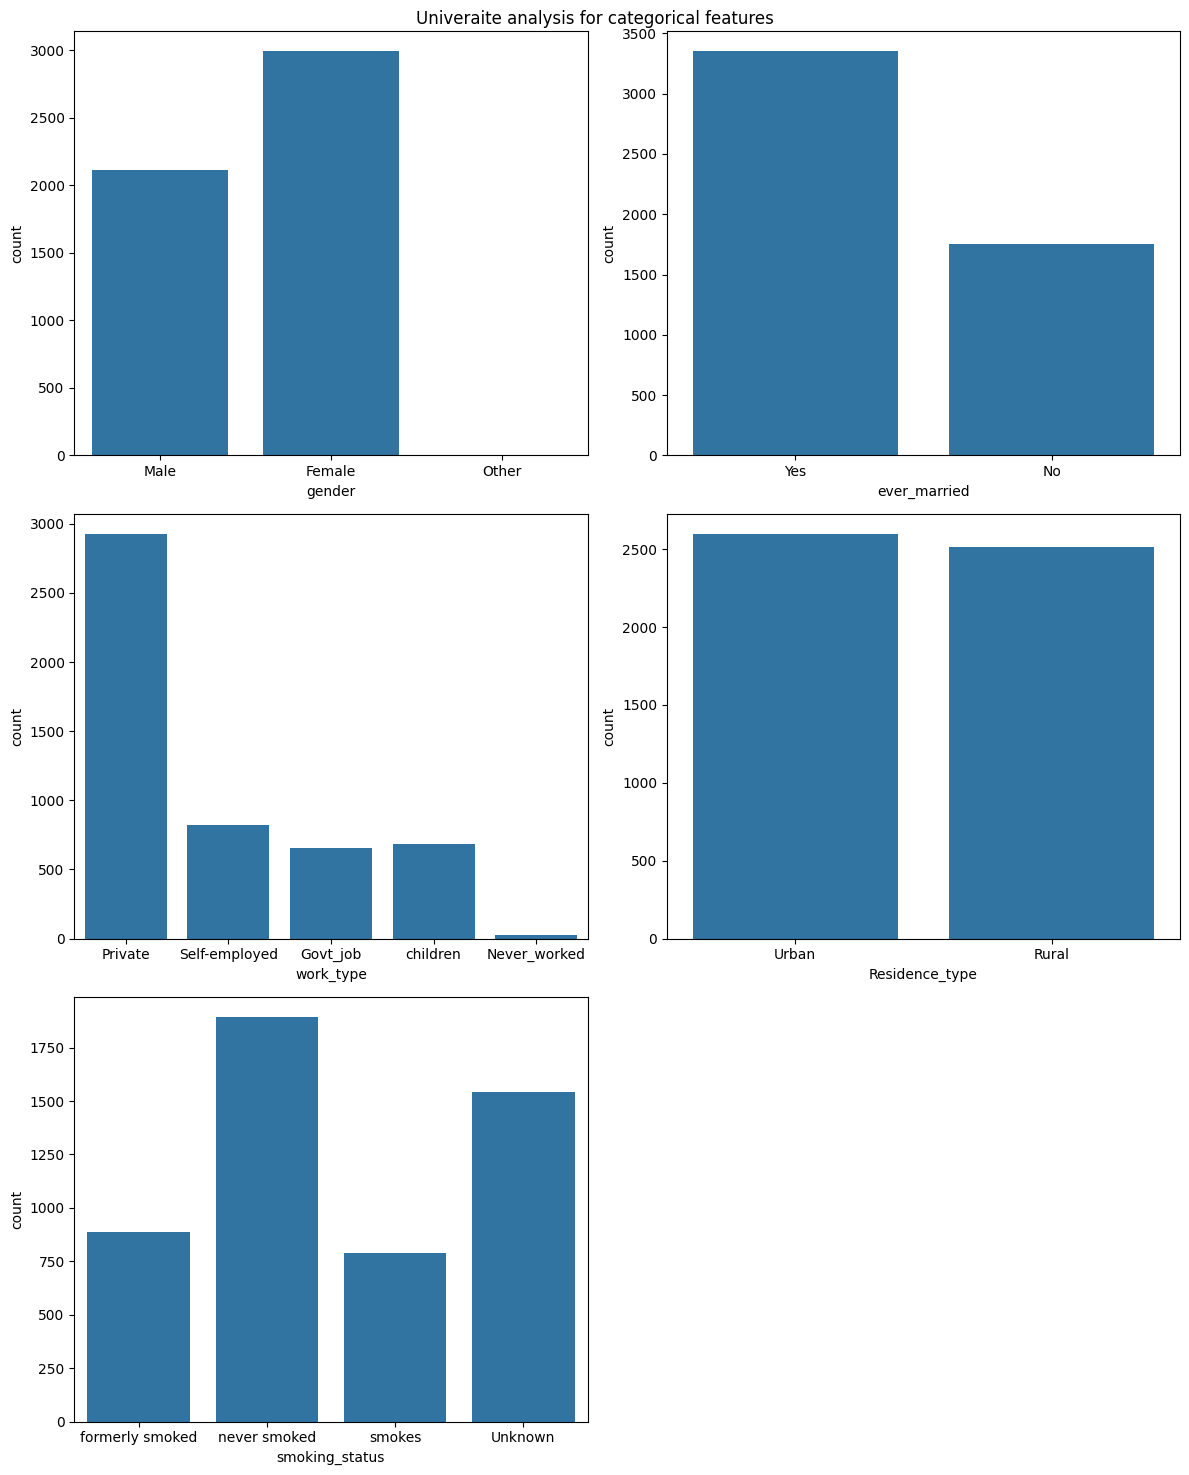

In [91]:
plt.figure(figsize=(12,15))
plt.suptitle("Univeraite analysis for categorical features")

for i in range(0, len(categorical_features)):
    plt.subplot(3,2, i+1)
    sns.countplot(x=data[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
#plt.show()      

### 5. Multivariate analysis



In [92]:
discrete_features   = [col for col in numerical_features if len(data[col].unique()) <= 25 & len(data[col].unique()) > 5]
continous_features  = [col for col in numerical_features if len(data[col].unique()) > 25]
encoded_categorical = [col for col in numerical_features if len(data[col].unique()) < 5]

print(f"discrete_features: {len(discrete_features)} | {discrete_features}")
print(f"discrete_features: {len(continous_features)} | {continous_features}")
print(f"discrete_features: {len(encoded_categorical)} | {encoded_categorical}")

discrete_features: 0 | []
discrete_features: 4 | ['id', 'age', 'avg_glucose_level', 'bmi']
discrete_features: 3 | ['hypertension', 'heart_disease', 'stroke']


In [93]:
categorical_features.to_list()

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [94]:
categorical_features = categorical_features.to_list() + encoded_categorical
print(f"categorical_features: {len(categorical_features)} | {categorical_features}")

categorical_features: 8 | ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']


##### Multi collinearity

<Axes: >

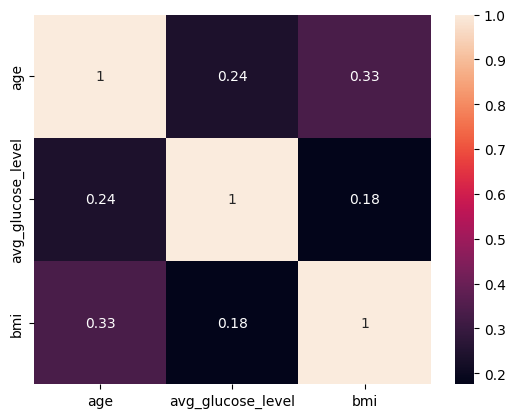

In [95]:
sns.heatmap(data[continous_features[1:]].corr(), annot=True)

* No multi collinearity present in the dataset, as there are no correlated features within the dataset

##### Multicollinearity for categorical features - Chi square test

* Chi Square - to show the relationship between two categorical variables
* 

In [116]:
import pandas as pd
from scipy.stats import chi2_contingency

chi2_result = []
# Create a contingency table
for col in categorical_features:
    print('\n')
    print(f"**{col}**")
    contingency_table = pd.crosstab(data[col], data['stroke'])
    
    print(contingency_table)
    
    # Perform the Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print the results
    print(f"Chi2 Statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(expected)
    
    # Interpretation
    alpha = 0.05  # Significance level
    if p < alpha:
        print("Reject the null hypothesis: There is a significant association between the input_feature and target_feature.")
        chi2_result.append('Reject the H0')
    else:
        print("Fail to reject the null hypothesis: There is no significant association between the input_feature and target_feature.")
        chi2_result.append('Fail to Reject the H0')



**gender**
stroke     0    1
gender           
Female  2853  141
Male    2007  108
Other      1    0
Chi2 Statistic: 0.47258662884530234
P-value: 0.7895490538408245
Degrees of Freedom: 2
Expected Frequencies:
[[2.84810841e+03 1.45891585e+02]
 [2.01194031e+03 1.03059687e+02]
 [9.51272016e-01 4.87279843e-02]]
Fail to reject the null hypothesis: There is no significant association between the input_feature and target_feature.


**ever_married**
stroke           0    1
ever_married           
No            1728   29
Yes           3133  220
Chi2 Statistic: 58.923890259034195
P-value: 1.6389021142314745e-14
Degrees of Freedom: 1
Expected Frequencies:
[[1671.38493151   85.61506849]
 [3189.61506849  163.38493151]]
Reject the null hypothesis: There is a significant association between the input_feature and target_feature.


**work_type**
stroke            0    1
work_type               
Govt_job        624   33
Never_worked     22    0
Private        2776  149
Self-employed   754   65
childre

In [123]:
chi2_df = pd.DataFrame(list(zip(categorical_features, chi2_result)), columns=['feature', 'chi2_result'])
chi2_df

,feature,chi2_result
0,gender,Fail to Reject the H0
1,ever_married,Reject the H0
2,work_type,Reject the H0
3,Residence_type,Fail to Reject the H0
4,smoking_status,Reject the H0
5,hypertension,Reject the H0
6,heart_disease,Reject the H0
7,stroke,Reject the H0


In [128]:
print(data['gender'].value_counts())
data['gender'] = np.where(data['gender']=='Other', 'Female', data['gender'])
print(data['gender'].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
gender
Female    2995
Male      2115
Name: count, dtype: int64


In [129]:
contingency_table = pd.crosstab(data['gender'], data['stroke'])

print(contingency_table)

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpretation
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between the input_feature and target_feature.")
    chi2_result.append('Reject the H0')
else:
    print("Fail to reject the null hypothesis: There is no significant association between the input_feature and target_feature.")
    chi2_result.append('Fail to Reject the H0')

stroke     0    1
gender           
Female  2854  141
Male    2007  108
Chi2 Statistic: 0.34312923759376157
P-value: 0.5580285118426893
Degrees of Freedom: 1
Expected Frequencies:
[[2849.05968689  145.94031311]
 [2011.94031311  103.05968689]]
Fail to reject the null hypothesis: There is no significant association between the input_feature and target_feature.


* Gender & residence_type - not related to target column(not correlated)

C:\Users\SAIRAM\AppData\Local\Temp\ipykernel_10428\220229427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='stroke', y=col, palette=clr1, ax=ax[i,0])
C:\Users\SAIRAM\AppData\Local\Temp\ipykernel_10428\220229427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='stroke', y=col, palette=clr1, ax=ax[i,0])
C:\Users\SAIRAM\AppData\Local\Temp\ipykernel_10428\220229427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='stroke', y=col, palette=clr1, ax=ax[i,0])
C:\Users\SAIRAM\AppData\Local\Temp\ipyke

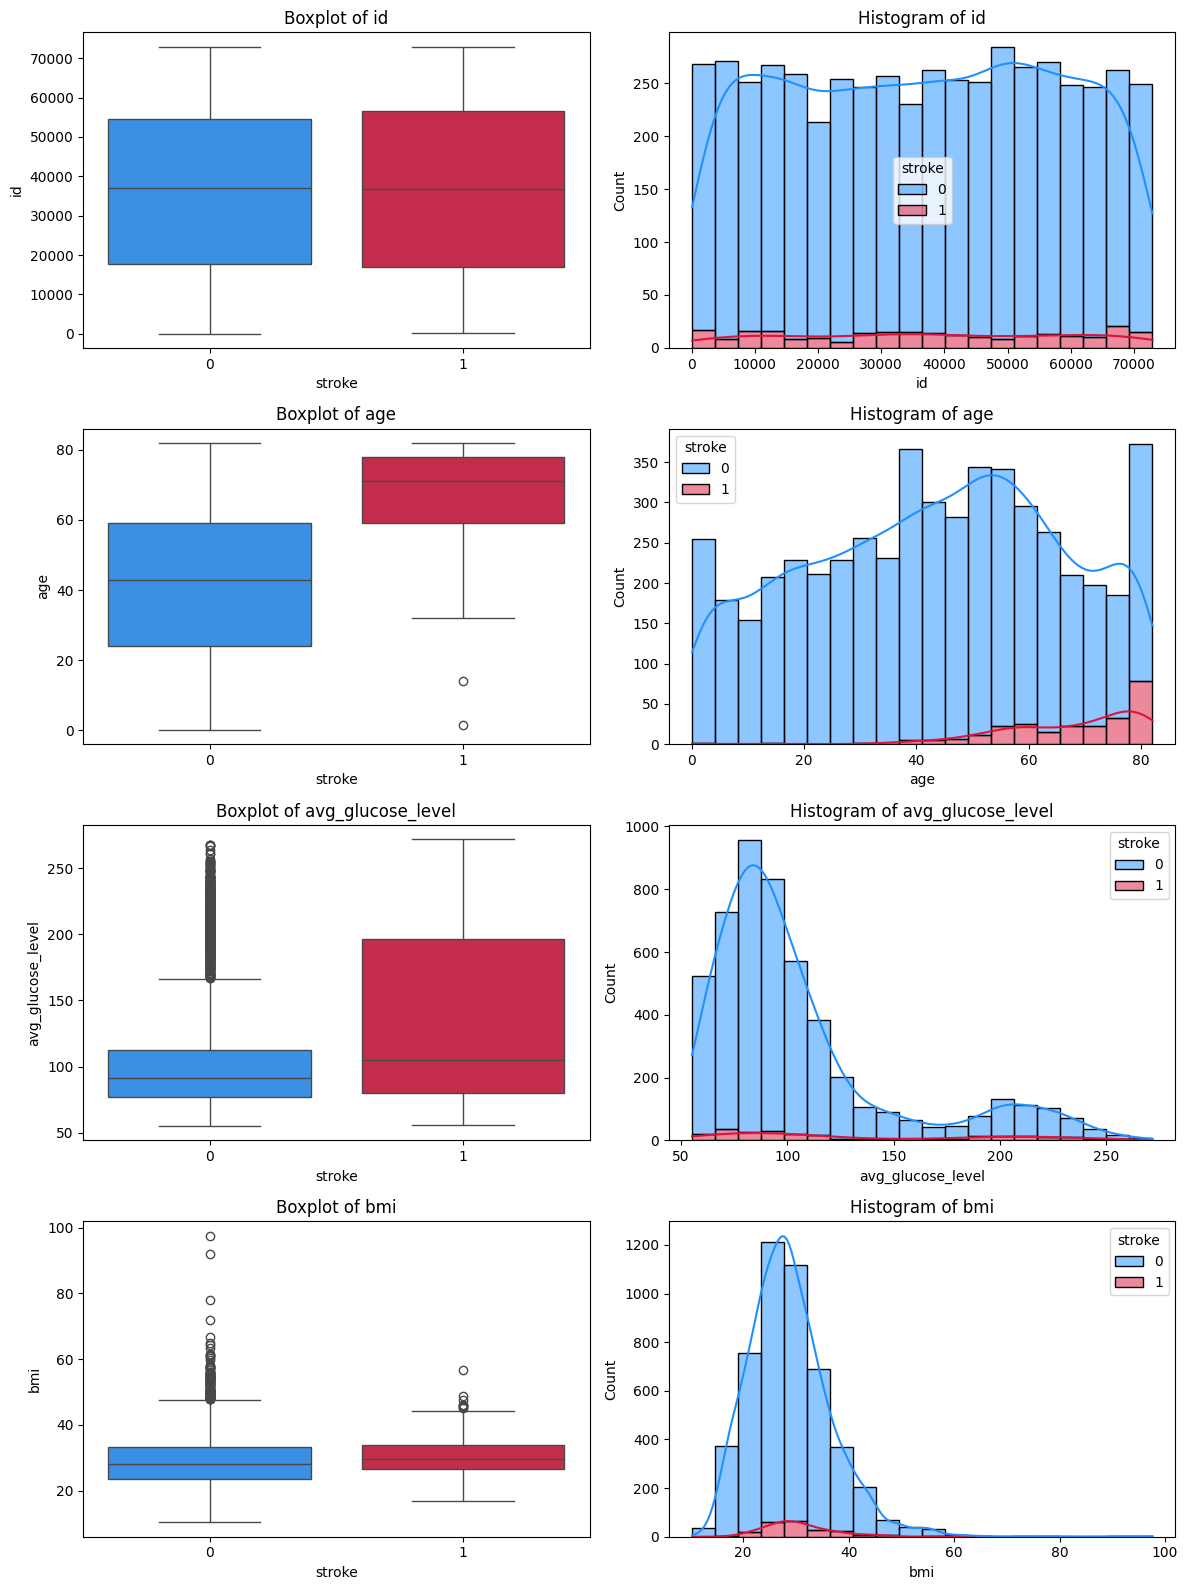

In [132]:
clr1 = ['#1E90FF','#DC143C']
fig, ax = plt.subplots(4,2,figsize=(12,16))
for i, col in enumerate(continous_features):
    sns.boxplot(data=data, x='stroke', y=col, palette=clr1, ax=ax[i,0])
    ax[i, 0].set_title(f'Boxplot of {col}')

    sns.histplot(data=data, x=col, hue='stroke', ax=ax[i,1], bins=20, kde=True, palette=clr1, multiple='stack')
    ax[i,1].set_title(f'Histogram of {col}')
fig.tight_layout()
fig.show()

* Higher the age, more chances of stroke
* Higher the glucose level, relatively more chances of stroke
* BMI - not much of signals from bmi towards the stroke

### 6. Visualizations

In [137]:
data_viz = data.copy()
data_viz['stroke'] = np.where(data_viz['stroke'] == 1, 'Stroke', 'Not-Stroke')

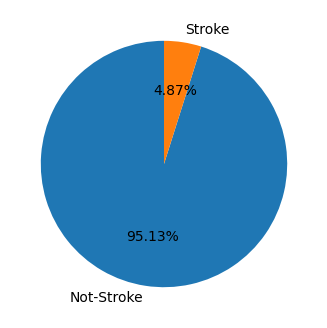

In [147]:
percentage = data_viz['stroke'].value_counts(normalize=True) * 100
label      = ['Not-Stroke', 'Stroke']

fig, ax = plt.subplots(figsize=(8,4))
ax.pie(percentage, labels=label, startangle=90, autopct='%1.2f%%')
plt.show()

* Do men or women have more chances of stroke?

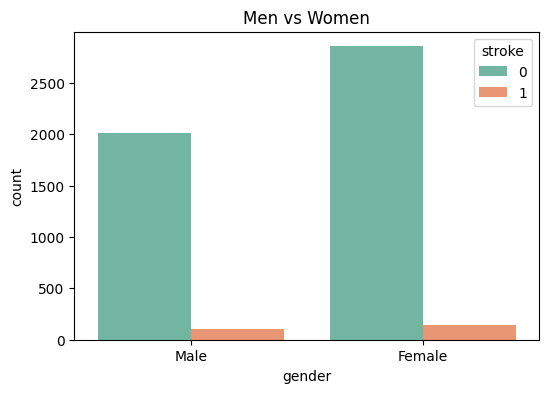

In [157]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=data, x='gender', hue='stroke', palette='Set2')
plt.title("Men vs Women")
plt.show()

* Age category split & stroke impact

In [158]:
bins   = [0,10,20,50,85]
labels = ['children', 'teen', 'adult', 'elders']
data_viz['age_cut']  = pd.cut(data_viz['age'], bins=bins, labels=labels, right=False)
data_viz['age_cut']

0       elders
1       elders
2       elders
3        adult
4       elders
         ...  
5105    elders
5106    elders
5107     adult
5108    elders
5109     adult
Name: age_cut, Length: 5110, dtype: category
Categories (4, object): ['children' < 'teen' < 'adult' < 'elders']

In [165]:
age_group = data_viz.groupby(['age_cut', 'stroke'])['id'].count().reset_index(name='count')
age_group

C:\Users\SAIRAM\AppData\Local\Temp\ipykernel_10428\3087516305.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group = data_viz.groupby(['age_cut', 'stroke'])['id'].count().reset_index(name='count')


,age_cut,stroke,count
0,children,Not-Stroke,471
1,children,Stroke,1
2,teen,Not-Stroke,493
3,teen,Stroke,1
4,adult,Not-Stroke,1916
5,adult,Stroke,18
6,elders,Not-Stroke,1981
7,elders,Stroke,229


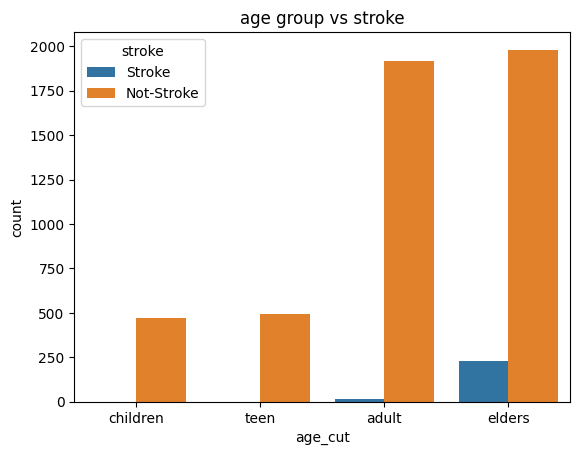

In [167]:
sns.countplot(data=data_viz, x='age_cut', hue='stroke')
plt.title('age group vs stroke')
plt.show()

In [170]:
df2 = data.copy()
bins   = [0,10,20,30,40,50,60,70,80,90]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
df2['age_cat'] = pd.cut(data['age'], labels=labels, bins=bins, right=True)
df2.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_cat
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60-70
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,60-70


<Axes: xlabel='age_cat'>

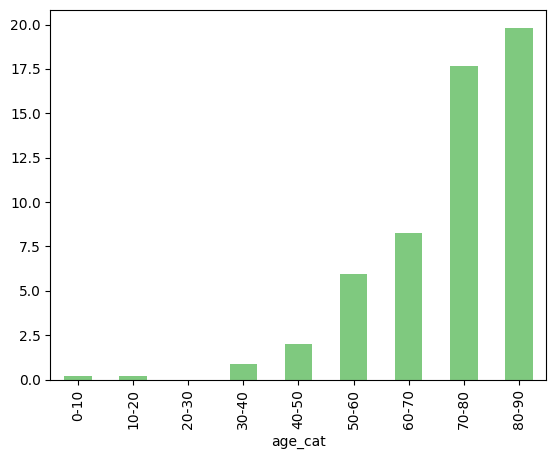

In [186]:
(100*(df2[df2['stroke'].isin([1])]['age_cat'].value_counts())/(df2['age_cat'].value_counts())).plot(kind="bar", stacked=True, colormap='Accent')

<Axes: xlabel='age_cat'>

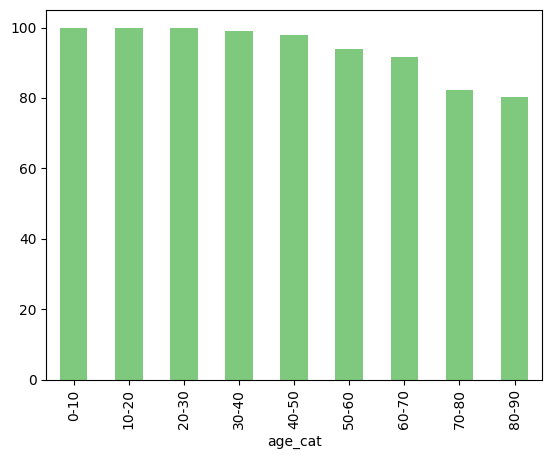

In [187]:
(100*(df2[df2['stroke'].isin([0])]['age_cat'].value_counts())/(df2['age_cat'].value_counts())).plot(kind="bar", stacked=True, colormap='Accent')

* As age increases, stroke chance increases 

<Axes: xlabel='hypertension', ylabel='count'>

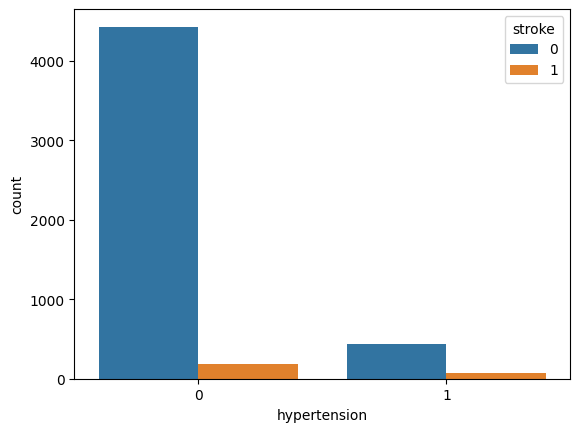

In [190]:
sns.countplot(data=df2, x='hypertension', hue='stroke')

<Axes: xlabel='hypertension'>

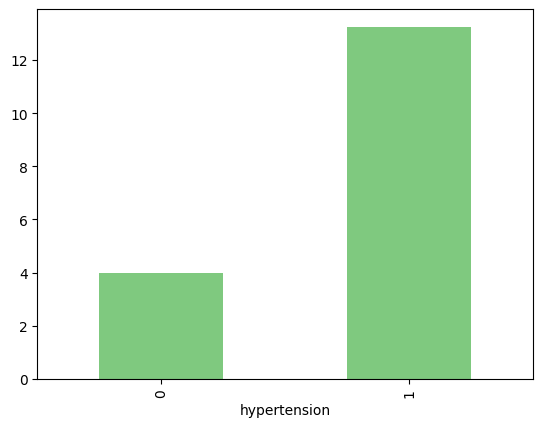

In [191]:
(100*(df2[df2['stroke'].isin([1])]['hypertension'].value_counts())/(df2['hypertension'].value_counts())).plot(kind="bar", stacked=True, colormap='Accent')

<Axes: xlabel='hypertension'>

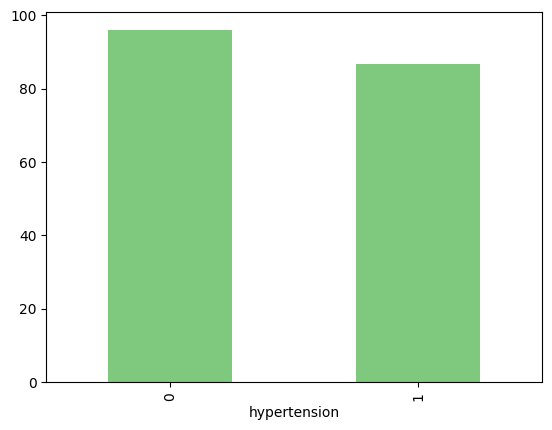

In [192]:
(100*(df2[df2['stroke'].isin([0])]['hypertension'].value_counts())/(df2['hypertension'].value_counts())).plot(kind="bar", stacked=True, colormap='Accent')

* 13% chance to get stroke if hypertension is present

In [196]:
bins   = [0,18.5,25, 30, 100]
labels = ['underweight', 'normal', 'over_weight', 'obese']
df2['bmi_cat'] = pd.cut(df2['bmi'], bins=bins, labels=labels, right=True)
df2['bmi_cat'].value_counts()

bmi_cat
obese          1893
over_weight    1409
normal         1258
underweight     349
Name: count, dtype: int64

<Axes: xlabel='bmi_cat'>

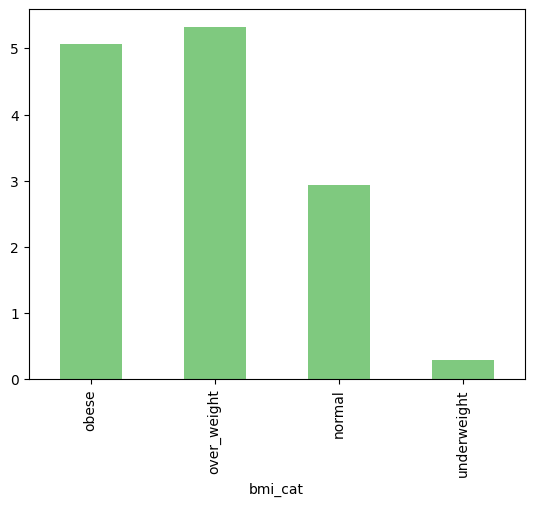

In [204]:
(100*(df2[df2['stroke'].isin([1])]['bmi_cat'].value_counts()/df2['bmi_cat'].value_counts())).plot(kind="bar", stacked=True, colormap='Accent')

* People in over weight category has more chance of stroke
* People in obese category has second more chance of stroke

<Axes: xlabel='heart_disease', ylabel='count'>

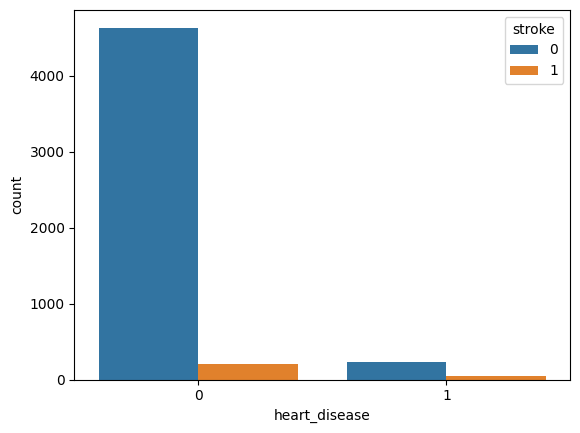

In [208]:
sns.countplot(data=df2, x='heart_disease', hue='stroke')

<Axes: xlabel='heart_disease'>

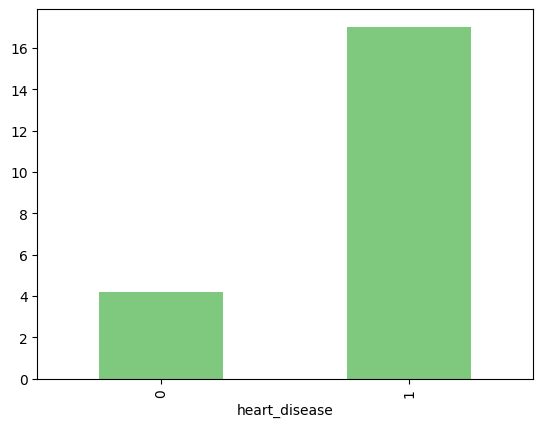

In [209]:
(100*(df2[df2['stroke'].isin([1])]['heart_disease'].value_counts()/df2['heart_disease'].value_counts())).plot(kind="bar", stacked=True, colormap='Accent')

* 17% of chance to get stroke if heart disease is there

In [2]:
import yaml
import sys

def read_yaml(file_path):
    try:
        with open(file_path, 'r') as file:
            config = yaml.safe_load(file)
            return config
    except FileNotFoundError:
        print(f"Error: The file at path {file_path} was not found.")
        sys.exit(1)
    except yaml.YAMLError as e:
        print(f"Error: Failed to parse YAML file at path {file_path}. Error: {e}")
        sys.exit(1)

In [5]:
read_yaml("D:\AI\heart-stroke-prediction\config\schema.yaml")['Drop_columns']

['id']